<a href="https://colab.research.google.com/github/Shrutika01234/Stock/blob/master/StockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uplodade = files.upload()

Saving LAURUSLAB.csv to LAURUSLAB.csv


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import datetime as dt
import pandas_datareader as web 

from sklearn.preprocessing import MinMaxScaler
import sklearn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , LSTM
import tensorflow as tf

data = pd.read_csv('LAURUSLAB.csv')
print(data)

           Date        Open        High         Low       Close   Adj Close  \
0      4/3/2017  103.070000  105.800003  103.059998  104.160004   98.954979   
1      4/5/2017  104.650002  105.620003  103.620003  104.260002   99.049980   
2      4/6/2017  104.400002  105.279999  103.199997  103.589996   98.413452   
3      4/7/2017  103.300003  104.199997  100.500000  102.000000   96.902924   
4     4/10/2017  102.000000  104.800003  102.000000  102.809998   97.672432   
...         ...         ...         ...         ...         ...         ...   
1039  6/22/2021  610.700012  618.150024  607.750000  613.299988  613.299988   
1040  6/23/2021  618.000000  619.349976  611.799988  615.150024  615.150024   
1041  6/24/2021  615.000000  628.299988  611.650024  625.599976  625.599976   
1042  6/25/2021  630.000000  682.950012  628.950012  650.650024  650.650024   
1043  6/28/2021  658.849976  683.400024  657.349976  676.250000  676.250000   

       Volume  
0       62345  
1       96120  
2  

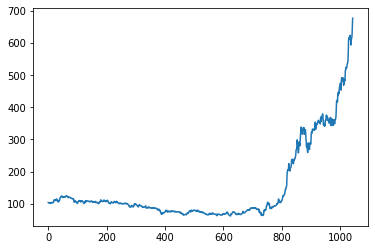

In [4]:
trainset = data.iloc[:,4:5]


length =  len(trainset)
traning_size = int(length*0.65)
test_size = length-traning_size

plt.plot(trainset)
plt.show()

In [5]:
print(traning_size)
print(test_size)


678
366


In [6]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset.values.reshape(-1,1))
print(training_scaled)

train_data , test_data = training_scaled[0:traning_size,:],training_scaled[traning_size:length,:1]

[[0.06771071]
 [0.06787367]
 [0.06678182]
 ...
 [0.91745971]
 [0.95828177]
 [1.        ]]


In [9]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset.values.reshape(-1,1))
print(training_scaled)

train_data , test_data = training_scaled[0:traning_size,:],training_scaled[traning_size:length,:1]

import numpy

def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

print(X_train.shape)
print(y_train.shape)

[[0.06771071]
 [0.06787367]
 [0.06678182]
 ...
 [0.91745971]
 [0.95828177]
 [1.        ]]
(662, 15)
(662,)


In [10]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 15, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
from sklearn.preprocessing import StandardScaler

model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=10)



train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

train_predict=sc.inverse_transform(train_predict)
test_predict=sc.inverse_transform(test_predict)

print(train_predict)
print(test_predict)

Epoch 1/100
67/67 [==============================] - 9s 35ms/step - loss: 2.9462e-04 - val_loss: 0.0049
Epoch 2/100
67/67 [==============================] - 1s 18ms/step - loss: 4.2023e-05 - val_loss: 0.0042
Epoch 3/100
67/67 [==============================] - 2s 26ms/step - loss: 3.8671e-05 - val_loss: 0.0032
Epoch 4/100
67/67 [==============================] - 1s 18ms/step - loss: 4.5057e-05 - val_loss: 0.0028
Epoch 5/100
67/67 [==============================] - 1s 17ms/step - loss: 4.2024e-05 - val_loss: 0.0024
Epoch 6/100
67/67 [==============================] - 1s 21ms/step - loss: 5.3388e-05 - val_loss: 0.0013
Epoch 7/100
67/67 [==============================] - 1s 18ms/step - loss: 4.7285e-05 - val_loss: 0.0057
Epoch 8/100
67/67 [==============================] - 1s 19ms/step - loss: 3.6274e-05 - val_loss: 0.0014
Epoch 9/100
67/67 [==============================] - 1s 17ms/step - loss: 3.0226e-05 - val_loss: 9.6790e-04
Epoch 10/100
67/67 [==============================] - 1s 21m

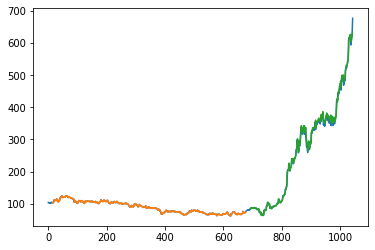

366
[0.99108136]
16
1 day input [0.89293395 0.9018154  0.89448211 0.91094123 0.91363014 0.90629685
 0.89374876 0.86457862 0.87948958 0.8974154  0.90043026 0.91745971
 0.95828177 1.         0.99108136]
1 day output [[0.9942488]]
2 day input [0.9018154  0.89448211 0.91094123 0.91363014 0.90629685 0.89374876
 0.86457862 0.87948958 0.8974154  0.90043026 0.91745971 0.95828177
 1.         0.99108136 0.99424881]
2 day output [[0.99563956]]
3 day input [0.89448211 0.91094123 0.91363014 0.90629685 0.89374876 0.86457862
 0.87948958 0.8974154  0.90043026 0.91745971 0.95828177 1.
 0.99108136 0.99424881 0.99563956]
3 day output [[0.9972459]]
4 day input [0.91094123 0.91363014 0.90629685 0.89374876 0.86457862 0.87948958
 0.8974154  0.90043026 0.91745971 0.95828177 1.         0.99108136
 0.99424881 0.99563956 0.99724591]
4 day output [[0.99923456]]
5 day input [0.91363014 0.90629685 0.89374876 0.86457862 0.87948958 0.8974154
 0.90043026 0.91745971 0.95828177 1.         0.99108136 0.99424881
 0.995639

In [12]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

math.sqrt(mean_squared_error(ytest,test_predict))

look_back=15
trainPredictPlot = numpy.empty_like(training_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = numpy.empty_like(training_scaled)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(training_scaled)-1, :] = test_predict

plt.plot(sc.inverse_transform(training_scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

print(len(test_data))   

x_input = test_data[351:].reshape(1,-1)


temp_input=list(x_input)

temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=15
i=0
while(i<8):
    
    if(len(temp_input)>15):
       
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
    
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(sc.inverse_transform(lst_output))


print(trainset)